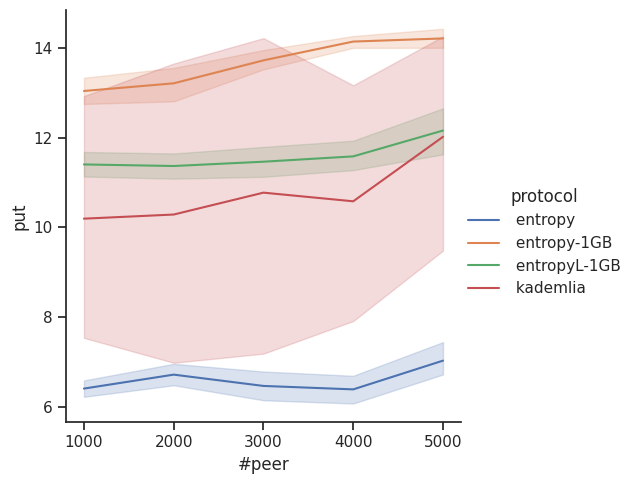

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='ticks')

latency = pd.concat([
    pd.read_csv('data/EntropyLatency.txt'),
    pd.read_csv('data/KadLatency.txt'),
]).reset_index()
# print(latency.info())

sns.relplot(kind='line', data=latency, x='#peer', y='put', hue='protocol')
# sns.pointplot(data=latency, x='#peer', y='put', hue='protocol', ax=ax)

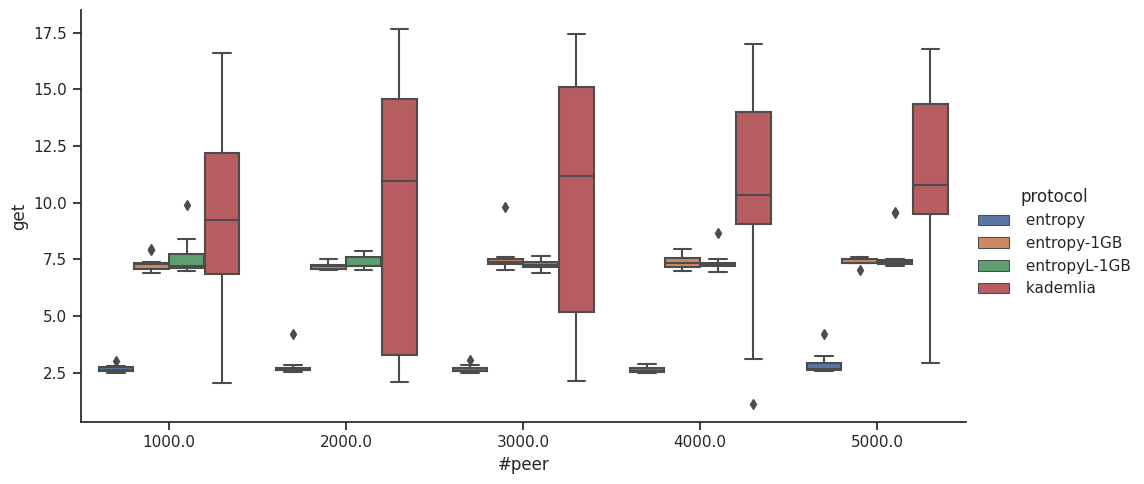

In [29]:
sns.catplot(
    data=latency, x='#peer', y='get', hue='protocol',
    kind='box',
    aspect=16 / 8,
)